In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore small warnings
import warnings
warnings.filterwarnings('ignore') 

print('Libraries imported successfully')

Libraries imported successfully


1. Reading the Data

In [2]:
dataSet_path = r"C:/Users/pakas/OneDrive/Documents/pandas/tested.csv"
titanic_ds = pd.read_csv(dataSet_path)
titanic_ds.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


2. Data Composition

In [17]:
print("📋 DATA COMPOSITION SUMMARY")
print("="*50)
print(f"Total observations : {titanic_ds.shape[0]}")
print(f"Total variables (columns): {titanic_ds.shape[1]}")
print(f"\nColumn names and their data types:")
titanic_ds.info()

📋 DATA COMPOSITION SUMMARY
Total observations : 418
Total variables (columns): 12

Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [40]:
# Function to find the missing values is a dataframe
def report_missing_values(data):
    missing = data.isna().sum()
    percent = (missing / len(data)) * 100

    report = pd.DataFrame({ 
            'Missing Count'      : missing,
            'Missing percentage' : np.round(percent , 2)
        })

    return report[report['Missing Count'] > 0]

In [42]:
missing_report = report_missing_values(titanic_ds)
print("Missing Values Report:")
print("="*40)
print(missing_report)

Missing Values Report:
       Missing Count  Missing percentage
Age               86               20.57
Fare               1                0.24
Cabin            327               78.23


In [54]:
# Classification of columns into categorical and numerical

def classify_cols(data):
    cat  = []
    nums = []

    for col in data.columns:
        if data[col].dtype == 'object':
            cat.append(col)
        elif data[col].dtype in ['int64' , 'float64']:
            if data[col].nunique() < 10:
                cat.append(col)
            else:
                nums.append(col)
    return cat , nums  

In [55]:
cat_vars, num_vars = classify_cols(titanic_ds)

print("🎨 Variable Classification:")
print("="*40)
print(f"Categorical Variables ({len(cat_vars)}):", cat_vars)
print(f"\nNumerical Variables ({len(num_vars)}):", num_vars)

🎨 Variable Classification:
Categorical Variables (9): ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

Numerical Variables (3): ['PassengerId', 'Age', 'Fare']


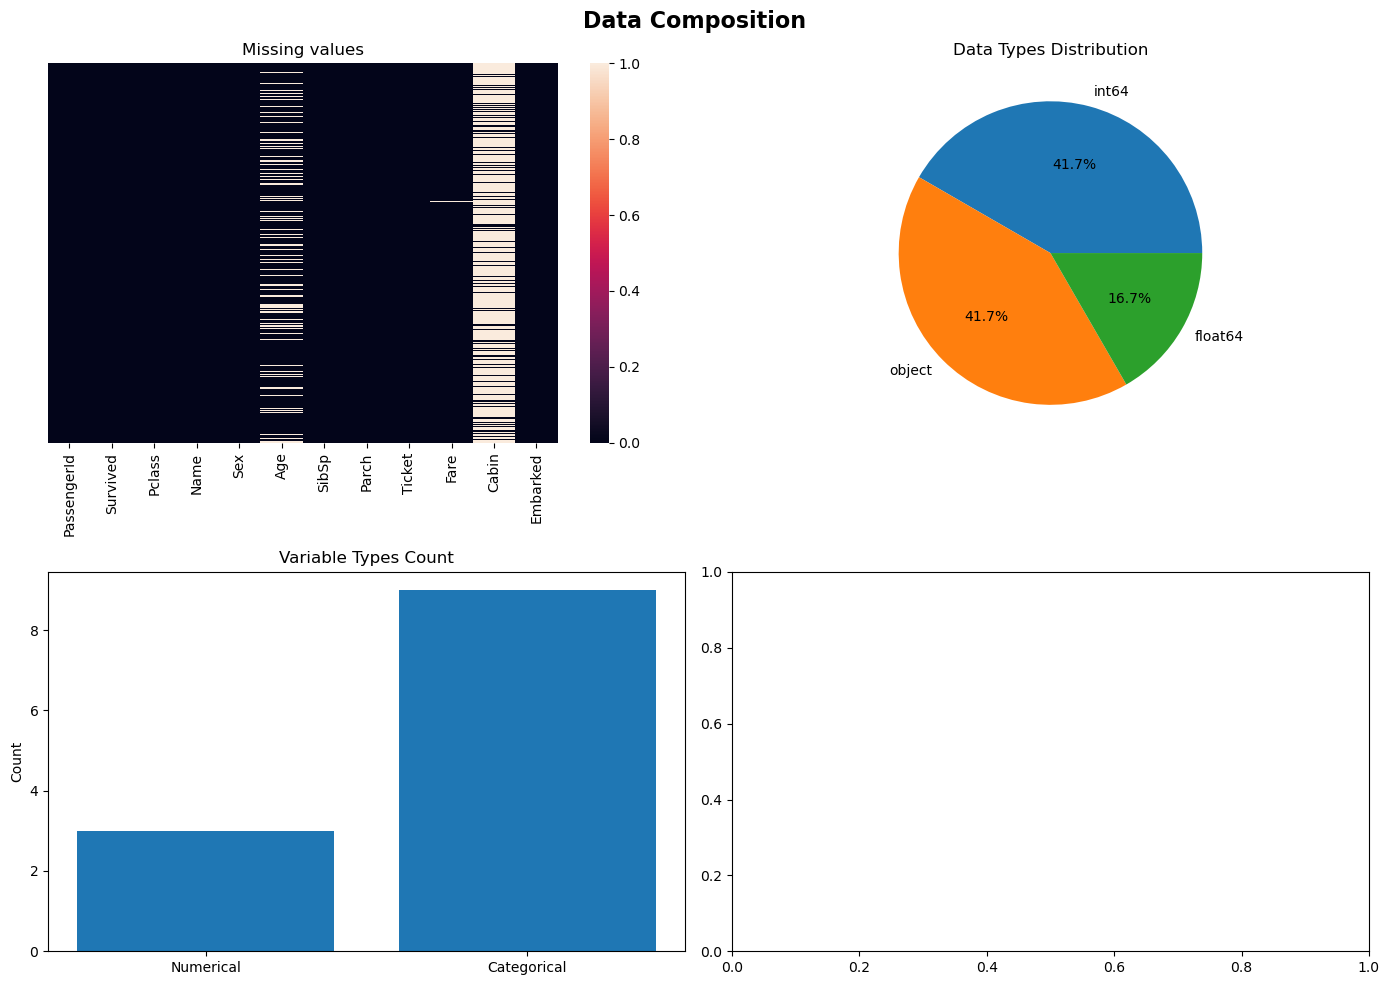

In [67]:
# Graphical representation of Data Composition

fig , axs = plt.subplots(2,2 , figsize = (14 , 10))
fig.suptitle("Data Composition",fontsize=16, fontweight='bold')

sns.heatmap(titanic_ds.isna(), yticklabels = False, ax = axs[0 , 0])
axs[0,0].set_title("Missing values")

data_types = titanic_ds.dtypes.value_counts()
axs[0,1].pie(data_types.values  , labels = data_types.index , autopct = '%1.1f%%')
axs[0,1].set_title("Data Types Distribution")

axs[1,0].bar(['Numerical' , 'Categorical'] , [len(num_vars) , len(cat_vars)])
axs[1,0].set_title('Variable Types Count')
axs[1,0].set_ylabel('Count')

plt.tight_layout()
plt.show()

3. Data Distribution

In [73]:
# statistics of numerical data

print("Descriptive statistics for Numerical data")
print('='*85)
titanic_ds[num_vars].describe().T


Descriptive statistics for Numerical data


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [81]:
# Frequency for categorical data

print("📋 CATEGORICAL VARIABLES DISTRIBUTION")
print("="*45)

cols = ['Survived' , 'Pclass' , 'Sex' , 'Embarked']

for col in cols:
    print(f'\n{col.upper()}')
    print(titanic_ds[col].value_counts())
    print('-'*30)

📋 CATEGORICAL VARIABLES DISTRIBUTION

SURVIVED
Survived
0    266
1    152
Name: count, dtype: int64
------------------------------

PCLASS
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
------------------------------

SEX
Sex
male      266
female    152
Name: count, dtype: int64
------------------------------

EMBARKED
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
------------------------------


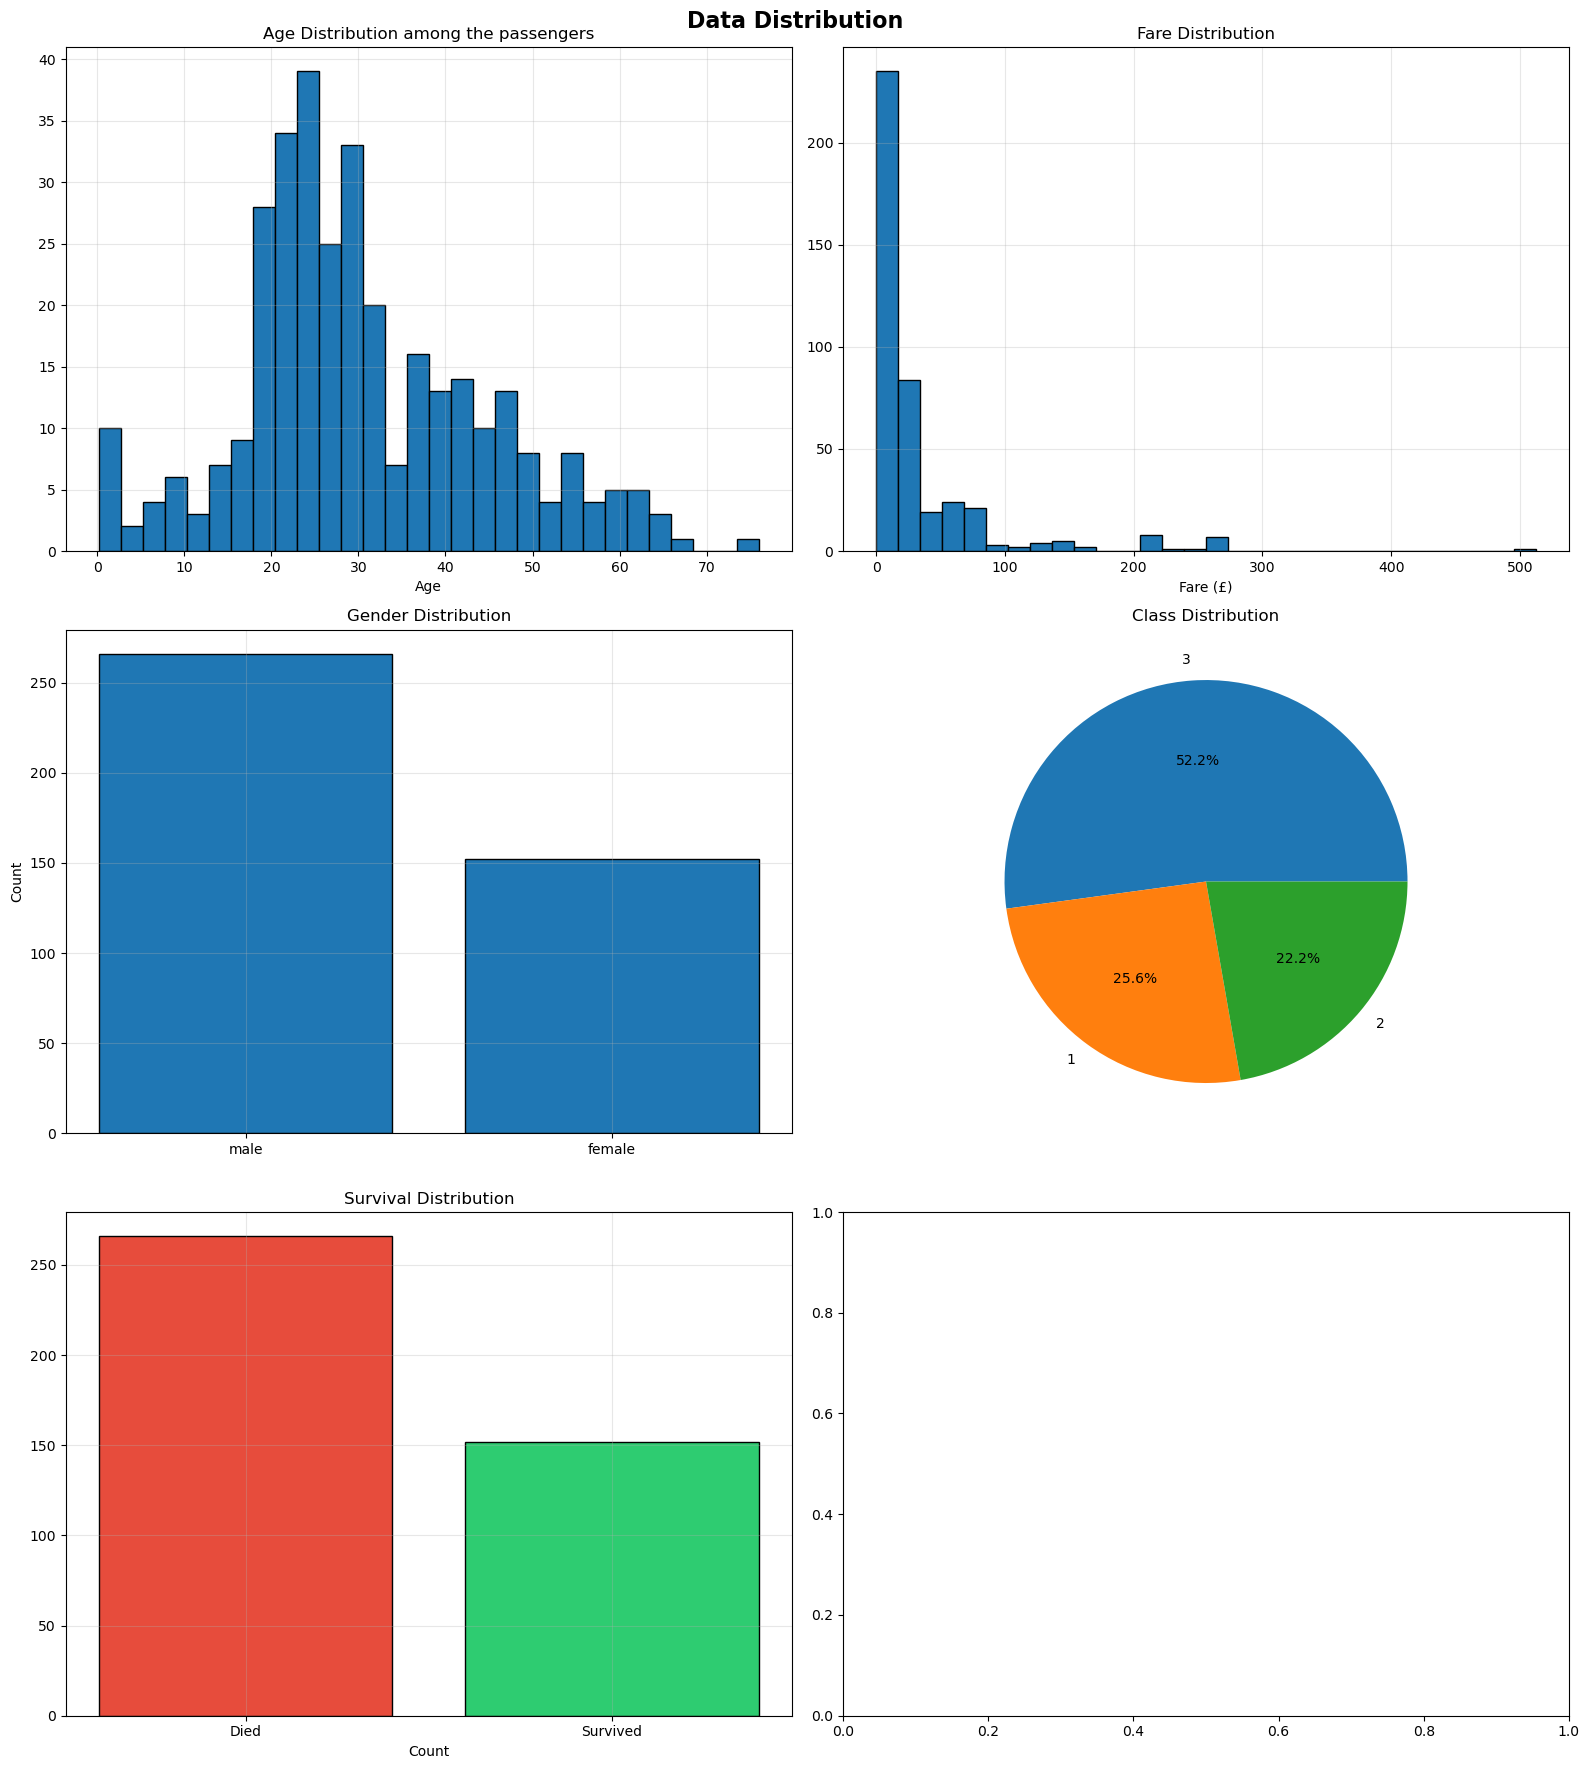

In [102]:
# Visualising the distributions

fig ,axs = plt.subplots(3,2 , figsize= (16 , 18))
fig.suptitle("Data Distribution" , fontsize = 16 , fontweight = 'bold')

#Age distribution
axs[0,0].hist(titanic_ds['Age'].dropna() ,bins = 30 ,  edgecolor = 'black')
axs[0,0].set_title("Age Distribution among the passengers")
axs[0,0].set_xlabel('Age')
axs[0,0].grid(True , alpha = 0.3)

#Fare Distribution
axs[0,1].hist(titanic_ds['Fare'].dropna(), bins = 30 , edgecolor = 'black')
axs[0,1].set_title("Fare Distribution")
axs[0,1].set_xlabel('Fare (£)')
axs[0,1].grid(True , alpha = 0.3)

#Gender Distribution
gender_counts = titanic_ds['Sex'].value_counts()
axs[1,0].bar(gender_counts.index , height = gender_counts.values, edgecolor = 'black')
axs[1,0].set_title('Gender Distribution')
axs[1,0].set_ylabel('Count')
axs[1,0].grid(True, alpha=0.3)

#Class distribution
class_groups = titanic_ds['Pclass'].value_counts()
axs[1,1].pie(class_groups.values , labels = class_groups.index , autopct = '%1.1f%%')
axs[1,1].set_title('Class Distribution')

#Survival Distribution
survival = titanic_ds['Survived'].value_counts()
colors = ['#E74C3C', '#2ECC71']
axs[2,0].bar(['Died' , 'Survived'] , survival.values , edgecolor = 'black' , color = colors)
axs[2,0].set_title('Survival Distribution')
axs[2,0].set_xlabel('Count')
axs[2,0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

4. Detecting outliers

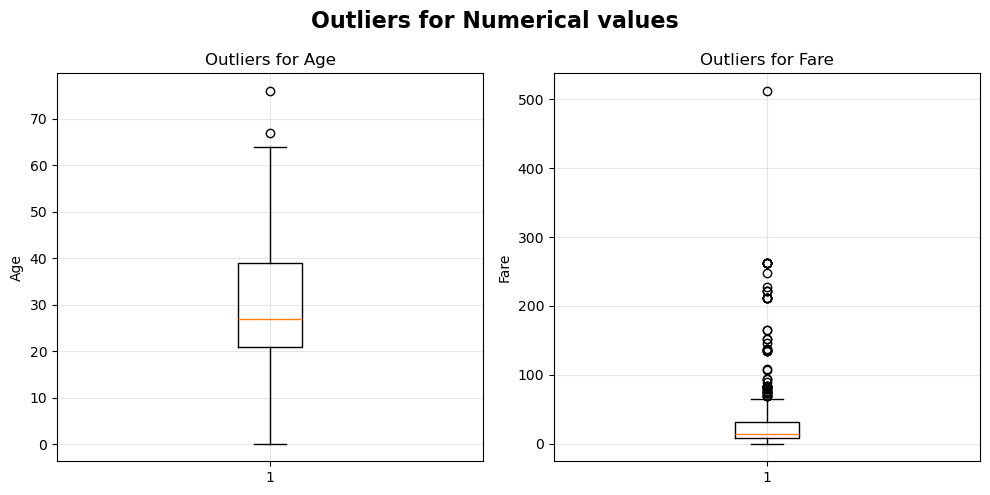

In [28]:
# Using box plots for detecting outliers

fig , axs = plt.subplots(1,2 , figsize = (10 , 5))
fig.suptitle("Outliers for Numerical values"  , fontweight = 'bold', fontsize = 16)

#Age outliers
axs[0].boxplot(titanic_ds['Age'].dropna())
axs[0].set_title('Outliers for Age')
axs[0].set_ylabel('Age')
axs[0].grid(True , alpha = 0.3)

#Fare outliers
axs[1].boxplot(titanic_ds['Fare'].dropna())
axs[1].set_title('Outliers for Fare')
axs[1].set_ylabel('Fare')
axs[1].grid(True , alpha = 0.3)

plt.tight_layout()
plt.show()

In [24]:
# Statistical Outlier detection using Interquartile Range(IQR)

def detect_outliers(data , col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers , lower_bound , upper_bound


outliers , lb, ub = detect_outliers(titanic_ds , 'Fare')

print(f"\n💰 FARE OUTLIERS:")
print(f"Lower Bound: £{lb:.2f}")
print(f"Upper Bound: £{ub:.2f}")
print(f"Total outliers: {len(outliers)}")
print(f"Percentage: {len(outliers)/len(titanic_ds)*100:.1f}%")
print('\n')
print("Top 5 Expensive Fare tickets : ")
print(titanic_ds.nlargest(5, 'Fare')[['Fare', 'Pclass', 'Embarked']])



💰 FARE OUTLIERS:
Lower Bound: £-27.51
Upper Bound: £66.91
Total outliers: 55
Percentage: 13.2%


Top 5 Expensive Fare tickets : 
         Fare  Pclass Embarked
343  512.3292       1        C
53   263.0000       1        S
69   263.0000       1        S
24   262.3750       1        C
59   262.3750       1        C


5. Data Relationships 

Correleation Matrix


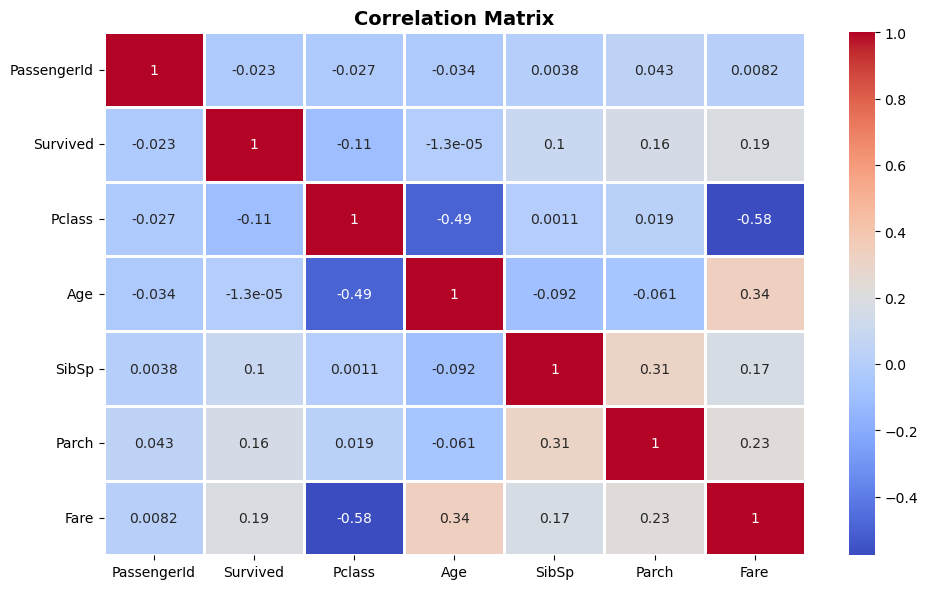

In [42]:
# Finding the correlation between numerical columns of the Dataframe

print("Correleation Matrix")
print("=" * 50)

numerical_df = titanic_ds.select_dtypes(include = [np.number])
correlation_matrix = numerical_df.corr()

#correlation matrix with heatmaps
plt.figure(figsize  = (10 , 6))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , linewidth = 1)
plt.title('Correlation Matrix' , fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


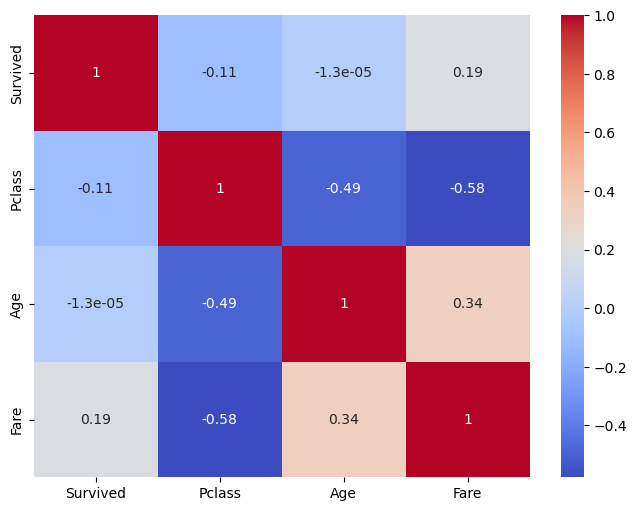

In [50]:
# Correlation among major paramerters
paramaeters = ['Survived' , 'Pclass' , 'Age' , 'Fare']

corr_matrix = titanic_ds[paramaeters].corr()

plt.figure(figsize = (8 , 6))
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')
plt.show()


🎭 GENDER VS SURVIVAL ANALYSIS
Raw Counts:
Survived    0    1
Sex               
female      0  152
male      266    0


Percentages:
Survived      0      1
Sex                   
female      0.0  100.0
male      100.0    0.0


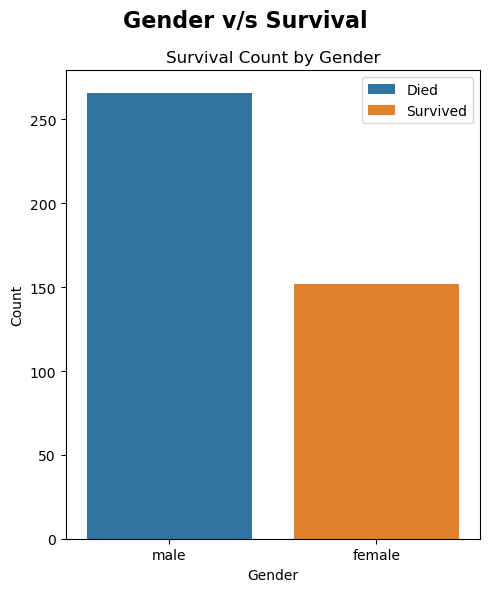

In [79]:
# Categorical Relationships
print("🎭 GENDER VS SURVIVAL ANALYSIS")
print("="*40)

gender_survival = pd.crosstab(titanic_ds['Sex'] , titanic_ds['Survived'])
gender_survival_pct = pd.crosstab(titanic_ds['Sex'] , titanic_ds['Survived'] , normalize = 'index') * 100

print("Raw Counts:")
print(gender_survival)
print("\n\nPercentages:")
print(gender_survival_pct.round(2))


fig , axs = plt.subplots(1,1 , figsize = (5 , 6))
fig.suptitle('Gender v/s Survival' , fontweight = 'bold' , fontsize = 16)

sns.countplot(data = titanic_ds , x = 'Sex' , hue = 'Survived' ,ax = axs)
axs.set_title('Survival Count by Gender')
axs.set_xlabel('Gender')
axs.set_ylabel('Count')
axs.legend(['Died', 'Survived'])
plt.tight_layout()
plt.show()


🎭 CLASS VS SURVIVAL ANALYSIS


Survival Rate by Class (%):


Survived      0      1
Pclass                
1         53.27  46.73
2         67.74  32.26
3         66.97  33.03


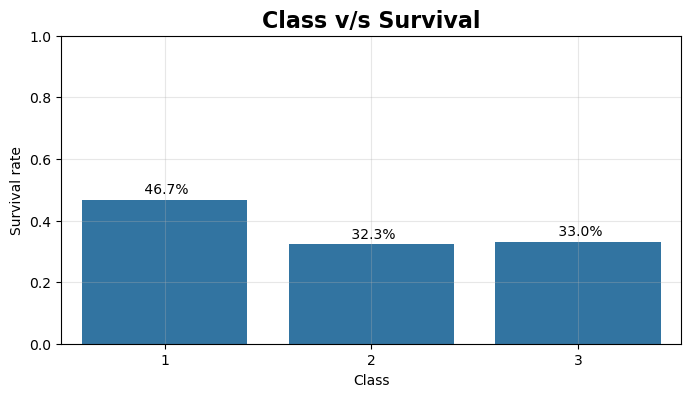

In [107]:
# Class v/s survival

print("🎭 CLASS VS SURVIVAL ANALYSIS")
print("="*40)
print('\n')

class_survival = pd.crosstab(titanic_ds['Pclass'], titanic_ds['Survived'], margins=True)
class_survival_pct = pd.crosstab(titanic_ds['Pclass'], titanic_ds['Survived'], normalize='index') * 100

print("Survival Rate by Class (%):")
print('\n')
print(class_survival_pct.round(2))


fig , axs = plt.subplots(1,1 , figsize = ( 8,4 ))

sns.barplot(data = titanic_ds , x = 'Pclass' , y = 'Survived' , ax = axs , ci = None)
axs.set_title('Class v/s Survival' , fontweight = 'bold' , fontsize = 16)
axs.set_ylim(0,1)
axs.set_xlabel('Class')
axs.set_ylabel('Survival rate')


for i,rate in enumerate(titanic_ds.groupby('Pclass').Survived.mean()):
    pct = rate*100
    plt.text(i , rate+0.02 , f'{pct : .1f}%' , ha = 'center')

plt.grid(True, alpha=0.3)
plt.show()


6. Data Comparison

🎯 MULTI-GROUP COMPARISON
Survival Rate by Class AND Gender:
               Total_Passengers  Survivors  Survival_rate  Survival_pct
Pclass Sex                                                             
1      female                50         50            1.0         100.0
       male                  57          0            0.0           0.0
2      female                30         30            1.0         100.0
       male                  63          0            0.0           0.0
3      female                72         72            1.0         100.0
       male                 146          0            0.0           0.0




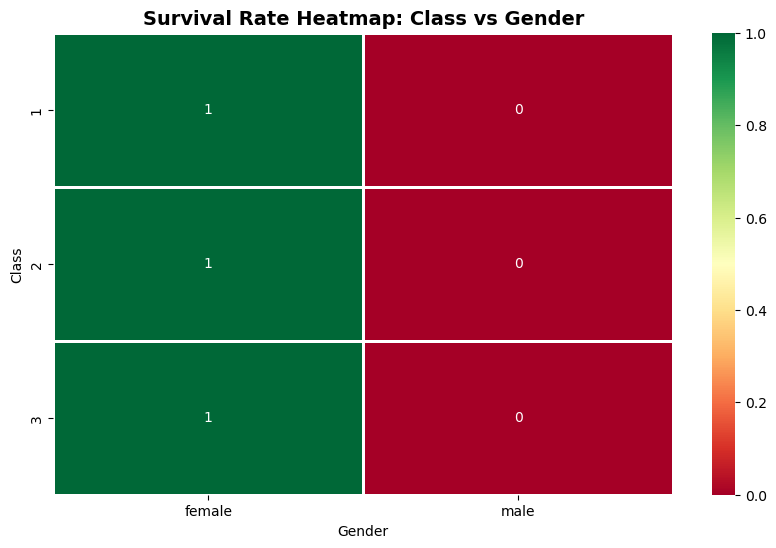

In [13]:
print("🎯 MULTI-GROUP COMPARISON")
print("="*60)

comparison = titanic_ds.groupby(['Pclass' , 'Sex']).Survived.agg(['count' , 'sum' , 'mean']).round(2)
comparison.columns = ['Total_Passengers' , 'Survivors' , 'Survival_rate']
comparison['Survival_pct'] = (comparison['Survival_rate']*100).round(1)

print("Survival Rate by Class AND Gender:")
print(comparison)

print('\n')

plt.figure(figsize=(10, 6))
survival_pivot = titanic_ds.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
sns.heatmap(survival_pivot, annot=True, cmap='RdYlGn',  linewidth = 2)
plt.title('Survival Rate Heatmap: Class vs Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Class')
plt.show()


Conclusion

The exploratory data analysis conducted on the Titanic dataset (418 records, 12 features) provided valuable insights into data quality, feature behavior, and survival patterns. A missing value analysis revealed that the Cabin column contained the highest proportion of missing data (78.23%), making it unsuitable for direct analysis without significant preprocessing. Other features showed manageable levels of missingness.

The dataset was systematically categorized into numerical and categorical variables, and the distribution of data types was visualized to understand feature composition. Outlier detection for numerical features highlighted extreme values, particularly in the Fare variable, indicating a highly skewed distribution.

Correlation analysis and feature relationship studies revealed meaningful associations with survival. A moderate negative correlation was observed between Fare and Pclass (–0.58), indicating that higher-class passengers paid higher fares. Survival analysis showed a positive correlation between Fare and Survived (0.19), suggesting that passengers who paid higher fares had better survival chances. Similarly, Pclass exhibited a negative correlation with survival (–0.11), reinforcing the conclusion that higher passenger class was associated with increased survival probability.

Gender-based analysis demonstrated a strong survival bias: among the 418 passengers, all 152 female passengers survived while all 266 male passengers did not, highlighting gender as the most influential factor in survival outcomes. Class-wise survival analysis further supported socioeconomic influence, with first-class passengers exhibiting the highest survival rate (46.7%), followed by second (32.3%) and third class (33.0%) passengers.

Finally, multigroup comparisons combining gender, class, and fare levels confirmed that survival probability was strongly influenced by a combination of demographic and socioeconomic factors. Overall, the analysis indicates that gender, passenger class, and fare were the most significant predictors of survival, providing a strong foundation for feature selection and predictive modeling in subsequent stages.